<a href="https://colab.research.google.com/github/kushshah777/MachineLearningAssignment1/blob/master/Answer5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import scipy
import cv2
import keras
from keras.datasets import mnist
from keras import backend as K
from scipy import ndimage
from skimage import util
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.layers import Input
from keras import layers
from keras import Model
rows = 28
columns= 28
dimension= rows*columns
handcrafted_feature = 1

Load mnist dataset so that we can find the connected components

In [0]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()


  

To convert grayscale images in 0 or 1 i.e black or white i used cv2 so the method cv2.threshold does is: if the pixel value is greater than the value passed in its parameter it will assign black or white image accordingly here i have selected 120 as pixel value


In [0]:
for i in range(len(x_train)):
  img=x_train[i]
  threshold=120
  x_train[i]=cv2.threshold(img,threshold,255,cv2.THRESH_BINARY)[1]
for i in range(len(x_test)):
  img=x_train[i]
  threshold=120
  x_test[i]=cv2.threshold(img,threshold,255,cv2.THRESH_BINARY)[1]
  

In [0]:
x_train=x_train/255.0; #to normalize data
x_train=x_train/255.0; #to normalize data

Use the following code to visualize the image


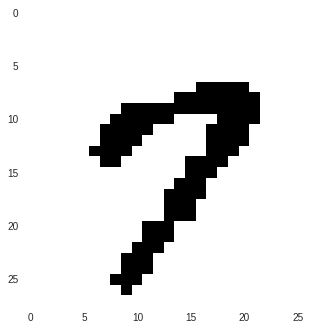

In [45]:
visualize = 9
index= -1
for i in range(len(y_train)):
  if y_train[i] == visualize:
    index =i
    break;
inverted=(x_train[index])
plt.grid(None)
plt.imshow(inverted)


We make vectors trainconnectedcomponents and testconnectedcomponents to hold the connected component data and then we use cipy.ndimage function to label it and get connected components


In [0]:
trainconnectedcomponents=np.zeros_like(y_train)
testconnectedcomponents=np.zeros_like(y_test)

for i in range(len(trainconnectedcomponents)):
  label,nearobjects=ndimage.label(util.invert(x_train[i]))
  trainconnectedcomponents[i] = nearobjects
for i in range(len(testconnectedcomponents)):
  label, nearobjects=ndimage.label(util.invert(x_train[i]))
  testconnectedcomponents[i]=nearobjects

Preparing data and normalizing with flatenning data 


In [0]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

if K.image_data_format()=='channels_first':
  x_train=x_train.reshape(x_train.shape[0],1,rows,columns)
  x_test=x_test.reshape(x_test.shape[0],1,rows,columns)
  inputvectorshape=(1,rows,columns)
else:
  x_train=x_train.reshape(x_train.shape[0],rows,columns,1)
  x_test=x_test.reshape(x_test.shape[0],rows,columns,1)
  inputvectorshape=(1,rows,columns)




In [0]:
x_train=x_train/ 255.0;
x_test=x_test/ 255.0;


trainconnectedcomponents=trainconnectedcomponents / 4
testconnectedcomponents=testconnectedcomponents / 4


In [0]:
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [0]:
x_train=x_train.reshape(x_train.shape[0],-1)
x_test=x_test.reshape(x_test.shape[0],-1)
y_train=y_train.T
y_train=y_train.T


There are 64 input neurons and has the activation function of sigmoid as we can just do 0 or 1 we do activation on input layer and then we add it with the hand crafted feature vector and then finally the output layer would be 10 neurons as always in this homework and then at the output layer we can use softmax which can recognize 10 classifiers and use that as activation function .

In [0]:
inputvectorshape= Input((dimension,))
featurevectorofconnectedcomponent= Input((handcrafted_feature,))
imagevector = Dense(64, activation="sigmoid")(inputvectorshape)
outputmodel = layers.add([ imagevector, featurevectorofconnectedcomponent])
outputmodel = Dense(10, activation="softmax")(outputmodel)
outputmodel = Model([inputvectorshape,featurevectorofconnectedcomponent], outputmodel)

We use schocastic gradient descent optimizer to optimize the code

In [52]:
schocasticgradientdescent= optimizers.SGD(lr=0.1)
outputmodel.compile(optimizer=schocasticgradientdescent, loss="categorical_crossentropy", metrics=["accuracy"])
outputmodel.fit([x_train,trainconnectedcomponents], y_train, nb_epoch=10, batch_size=32)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.5666 - acc: 0.8513
Epoch 2/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.2932 - acc: 0.9161
Epoch 3/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.2458 - acc: 0.9289
Epoch 4/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.2135 - acc: 0.9386
Epoch 5/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.1906 - acc: 0.9453
Epoch 6/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.1725 - acc: 0.9504
Epoch 7/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.1576 - acc: 0.9548
Epoch 8/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.1450 - acc: 0.9585
Epoch 9/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.1350 - acc: 0.9615
Epoch 10/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.1261 - acc: 0.9639

In [54]:
testresults=outputmodel.evaluate([x_test,testconnectedcomponents], y_test, verbose=0)
print('Accuracy:', testresults[1]*100, '%')

Accuracy: 96.00999999999999 %
